In [1]:
# Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
# Cargar el dataset
# Cargar el dataset
df = pd.read_csv('C:/Users/Windows 10/Downloads/Titanic-Dataset (1).csv')
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [25]:
# Mostrar información inicial
print(data.info())
print(data.describe())
print(data.columns)
print(data.isnull().sum())  # Valores faltantes por columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    bool   
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB
None
         Survived      Pclass         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642   29.361582    0.523008    0.381594   
std      0.486592    0.836071   13.019697    1.102743    0.806057   
min      0.000000    1.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000   22.

In [29]:
print(data.columns)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [35]:
# Selección de columnas relevantes
selected_columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male' , 'Embarked_S']
data = data[selected_columns]

In [43]:
# Manejar valores faltantes
data['Age'].fillna(data['Age'].median(), )  # Imputar edades con la mediana
data['Embarked_S'].fillna(data['Embarked_S'].mode()[0])  # Imputar puertos con la moda

0       True
1      False
2       True
3       True
4       True
       ...  
886     True
887     True
888     True
889    False
890    False
Name: Embarked_S, Length: 891, dtype: bool

In [45]:
# Convertir variables categóricas a numéricas
data = pd.get_dummies(data, columns=['Sex_male', 'Embarked_S'], drop_first=True)


In [47]:
# Escalar la columna 'Fare'
scaler = StandardScaler()
data['Fare'] = scaler.fit_transform(data[['Fare']])

In [57]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Inicializar y entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [61]:
# Predecir y evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [63]:
print(f"Accuracy: {accuracy:.2f}")
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.80
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



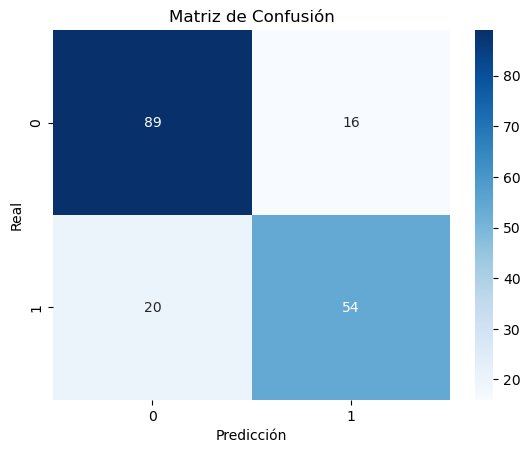

In [65]:
# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

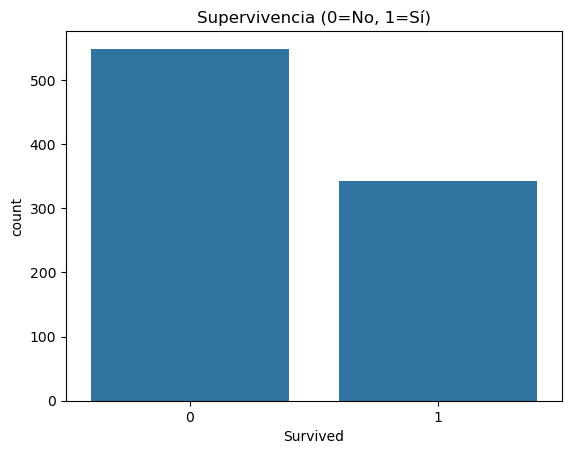

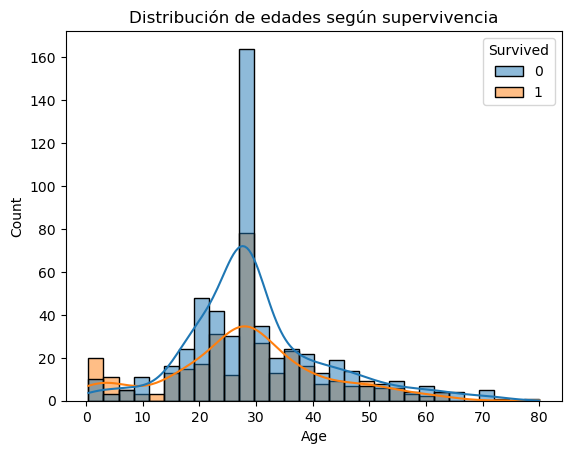

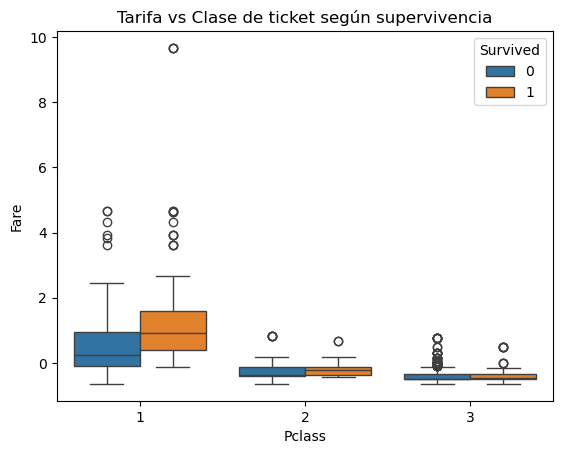

In [67]:
# Análisis exploratorio visual
sns.countplot(data=data, x='Survived')
plt.title('Supervivencia (0=No, 1=Sí)')
plt.show()

sns.histplot(data=data, x='Age', hue='Survived', kde=True)
plt.title('Distribución de edades según supervivencia')
plt.show()

sns.boxplot(data=data, x='Pclass', y='Fare', hue='Survived')
plt.title('Tarifa vs Clase de ticket según supervivencia')
plt.show()